In [ ]:
import pandas as pd
import wandb
api = wandb.Api()

names, configs, trf_learns, f1_scores = [], [], [], []

In [ ]:
sweep_ids = ['bk150cyb', 'hc9xhld7']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('baseline')
        trf_learns.append(run.config['transfer_learning'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    trf_learns.append(False)
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [ ]:
sweep_ids = ['6ci28yvx', 'x6xni07x']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('resnet34')
        trf_learns.append(run.config['transfer_learning'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], trf_learns[::-1], f1_scores[::-1])), columns=['config', 'name', 'transfer_learning', 'f1_score'])
f1_df.tail()

,config,name,transfer_learning,f1_score
35,baseline,rare-sweep-1,False,0.972910
36,baseline,earthy-sweep-2,False,0.971245
37,baseline,happy-sweep-3,False,0.980292
38,baseline,soft-sweep-4,False,0.979065
39,baseline,fluent-sweep-5,False,0.974682


In [ ]:
f1_df.to_csv('logs/09_baseline_transfer.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f1_df = pd.read_csv('logs/09_baseline_transfer.csv')

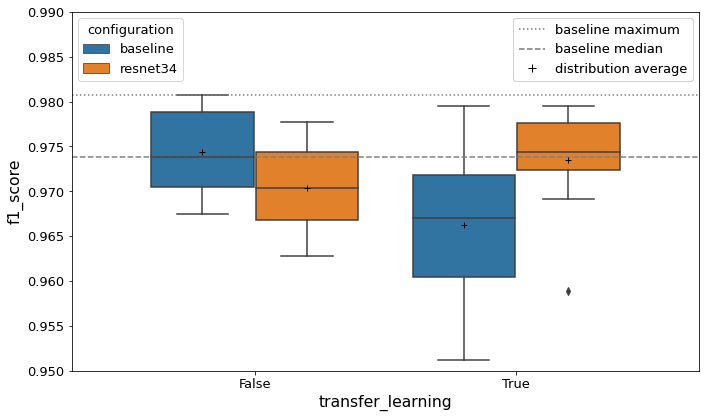

In [ ]:
import matplotlib.lines as mlines
plt.rc('font', size=13)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='transfer_learning', y='f1_score', hue='config', data=f1_df, 
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            hue_order=sorted(f1_df['config'].unique()))
plt.ylim([0.95, 0.99])
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='large')
ax.set_xlabel("transfer_learning", size='large')
#plt.xticks(fontsize='large')
leg1 = plt.legend(title='configuration', loc='upper left')
#ax.set_xticks([])

maximum = plt.hlines(0.980712, -0.7, 1.7, linestyles='dotted', color='grey', label='baseline maximum')
median = plt.hlines(0.973796, -0.7, 1.7, linestyles='dashed', color='grey', label='baseline median')
average = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=8, label='distribution average')
baseline_legend = ax.legend(handles=[maximum, median, average], loc='upper right')
ax.add_artist(baseline_legend)
ax.add_artist(leg1)

fig.tight_layout()

fig.savefig('../figs/glitches/09_transfer_baseline_arch_v2.pdf', dpi=300)